___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy import math

In [2]:
ri = pd.read_csv("RI_cleaned.csv")

C:\Users\Toshiba\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
ri.head(1)

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1


In [4]:
ri.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'out_of_state', 'drugs_related_stop',
       'district'],
      dtype='object')

In [5]:
ri.isnull()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True,True,False,True,...,False,True,True,False,True,True,True,True,False,False
3,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509676,False,False,True,True,False,True,True,True,True,True,...,True,True,True,False,True,True,True,True,False,False
509677,False,False,True,True,False,True,True,True,True,True,...,True,True,True,False,True,True,True,True,False,False
509678,False,False,True,True,False,True,True,True,True,True,...,True,True,True,False,True,True,True,True,False,False
509679,False,False,True,True,False,True,True,True,True,True,...,True,True,True,False,True,True,True,True,False,False


In [6]:
ri.isnull().sum()

id                            0
state                         0
stop_date                    10
stop_time                    10
location_raw                  0
county_name              509681
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

In [7]:
ri.shape

(509681, 26)

In [8]:
ri.drop(["county_name", "county_fips", "fine_grained_location"], axis = 1, inplace = True)

In [9]:
ri.shape

(509681, 23)

In [10]:
ri.isnull().sum()

id                         0
state                      0
stop_date                 10
stop_time                 10
location_raw               0
police_department         10
driver_gender          29097
driver_age_raw         29049
driver_age             30695
driver_race_raw        29073
driver_race            29073
violation_raw          29073
violation              29073
search_conducted          10
search_type_raw       491919
search_type           491919
contraband_found           0
stop_outcome           29073
is_arrested            29073
stop_duration          29073
out_of_state           29881
drugs_related_stop         0
district                   0
dtype: int64

In [11]:
ri.dropna(axis=0, subset=["driver_gender"], inplace = True)

In [12]:
ri.isnull().sum()

id                         0
state                      0
stop_date                  0
stop_time                  0
location_raw               0
police_department          0
driver_gender              0
driver_age_raw             1
driver_age              1638
driver_race_raw            0
driver_race                0
violation_raw              0
violation                  0
search_conducted           0
search_type_raw       462822
search_type           462822
contraband_found           0
stop_outcome               0
is_arrested                0
stop_duration              0
out_of_state             808
drugs_related_stop         0
district                   0
dtype: int64

In [13]:
ri.shape

(480584, 23)

In [14]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480584 entries, 0 to 509670
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  480584 non-null  object 
 1   state               480584 non-null  object 
 2   stop_date           480584 non-null  object 
 3   stop_time           480584 non-null  object 
 4   location_raw        480584 non-null  object 
 5   police_department   480584 non-null  object 
 6   driver_gender       480584 non-null  object 
 7   driver_age_raw      480583 non-null  float64
 8   driver_age          478946 non-null  float64
 9   driver_race_raw     480584 non-null  object 
 10  driver_race         480584 non-null  object 
 11  violation_raw       480584 non-null  object 
 12  violation           480584 non-null  object 
 13  search_conducted    480584 non-null  object 
 14  search_type_raw     17762 non-null   object 
 15  search_type         17762 non-null

In [15]:
ri["is_arrested"].head(1)

0    False
Name: is_arrested, dtype: object

In [16]:
ri["is_arrested"].dtype

dtype('O')

In [17]:
ri["is_arrested"] = ri.is_arrested.astype("bool")

In [18]:
ri["is_arrested"] 

0         False
1         False
3         False
4         False
5         False
          ...  
509666    False
509667    False
509668    False
509669    False
509670    False
Name: is_arrested, Length: 480584, dtype: bool

In [19]:
ri.head(1)

,id,state,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1


In [20]:
ri["stop_date"].dtype

dtype('O')

In [21]:
ri["stop_time"].dtype

dtype('O')

In [22]:
combined = ri["stop_date"] + " " + ri["stop_time"]

In [23]:
combined

0         2005-01-02 01:55
1         2005-01-02 20:30
3         2005-01-04 12:55
4         2005-01-06 01:30
5         2005-01-12 08:05
                ...       
509666    2015-12-31 22:46
509667    2015-12-31 22:47
509668    2015-12-31 23:08
509669    2015-12-31 23:44
509670    2015-12-31 23:48
Length: 480584, dtype: object

In [24]:
ri["stop_datetime"] = pd.to_datetime(combined)

In [25]:
ri.drop(["stop_date", "stop_time"], axis = "columns", inplace=True)

In [26]:
ri.head(1)

,id,state,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime
0,RI-2005-00001,RI,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00


In [27]:
ri.dtypes

id                            object
state                         object
location_raw                  object
police_department             object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race_raw               object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted              object
search_type_raw               object
search_type                   object
contraband_found                bool
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
out_of_state                  object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [28]:
ri.set_index("stop_datetime", inplace = True)

In [29]:
ri.head(1)

,id,state,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,RI,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1


In [30]:
ri.shape

(480584, 21)

In [31]:
ri.columns

Index(['id', 'state', 'location_raw', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested',
       'stop_duration', 'out_of_state', 'drugs_related_stop', 'district'],
      dtype='object')

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [32]:
ri["is_arrested"].mean()

0.03454755048024903

In [33]:
type(ri.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [34]:
ri.index

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2015-12-31 22:10:00', '2015-12-31 22:14:00',
               '2015-12-31 22:26:00', '2015-12-31 22:38:00',
               '2015-12-31 22:39:00', '2015-12-31 22:46:00',
               '2015-12-31 22:47:00', '2015-12-31 23:08:00',
               '2015-12-31 23:44:00', '2015-12-31 23:48:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480584, freq=None)

In [35]:
ri.index.hour

Int64Index([ 1, 20, 12,  1,  8,  8, 17, 23, 20,  3,
            ...
            22, 22, 22, 22, 22, 22, 22, 23, 23, 23],
           dtype='int64', name='stop_datetime', length=480584)

In [36]:
ri.groupby(ri.index.hour).is_arrested.mean()

stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64

In [37]:
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()
hourly_arrest_rate

stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64

***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

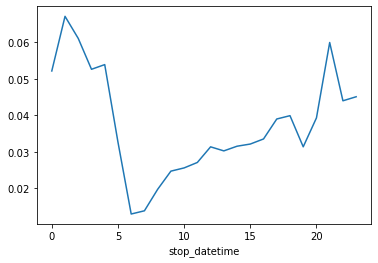

In [39]:
hourly_arrest_rate.plot();

plt.show()

In [40]:
plt.plot(x, y)

plt.title("Arrest Rate by Time of Day")
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")

plt.show()

NameError: name 'x' is not defined

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [41]:
ri.head(1)

,id,state,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,RI,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1


In [42]:
ri["drugs_related_stop"].value_counts()

False    475819
True       4765
Name: drugs_related_stop, dtype: int64

In [43]:
ri.drugs_related_stop.resample("A").mean()

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [44]:
annual_drug_rate = ri.drugs_related_stop.resample("A").mean()

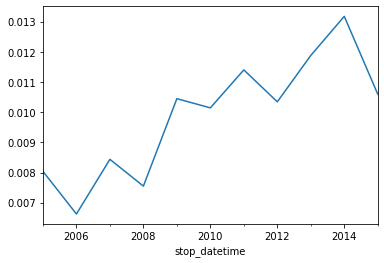

In [45]:
annual_drug_rate.plot()
plt.show()

***

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [46]:
ri["search_conducted"].dtype

dtype('O')

In [47]:
ri["search_conducted"].head(1)

stop_datetime
2005-01-02 01:55:00    False
Name: search_conducted, dtype: object

In [48]:
ri["search_conducted"].dropna().astype("int").resample("A").mean()

stop_datetime
2005-12-31    0.050692
2006-12-31    0.037748
2007-12-31    0.041844
2008-12-31    0.039544
2009-12-31    0.049849
2010-12-31    0.042089
2011-12-31    0.037767
2012-12-31    0.032278
2013-12-31    0.029054
2014-12-31    0.030157
2015-12-31    0.027832
Freq: A-DEC, Name: search_conducted, dtype: float64

In [49]:
annual_search_rate= ri["search_conducted"].dropna().astype("int").resample("A").mean()

In [50]:
#ri["search_conducted"] = ri.is_arrested.astype("bool")

In [51]:
#ri["search_conducted"].dtype

In [52]:
#ri["search_conducted"].value_counts()

In [53]:
#ri.search_conducted.resample("A").mean()

In [54]:
#annual_search_rate = ri.search_conducted.resample("A").mean()

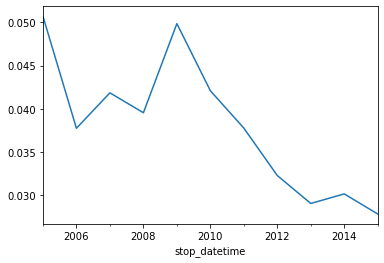

In [55]:
annual_search_rate.plot()
plt.show()

In [56]:
annual = pd.concat([annual_drug_rate,annual_search_rate],axis=1)

In [57]:
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.008038,0.050692
2006-12-31,0.006624,0.037748
2007-12-31,0.008437,0.041844
2008-12-31,0.007549,0.039544
2009-12-31,0.010447,0.049849
2010-12-31,0.010142,0.042089
2011-12-31,0.011400,0.037767
2012-12-31,0.010343,0.032278
2013-12-31,0.011879,0.029054


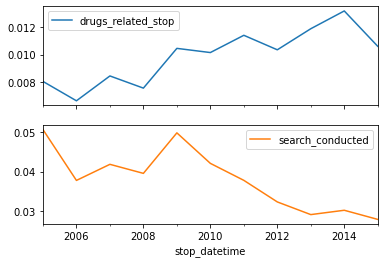

In [58]:
annual.plot(subplots=True);

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [59]:
pd.crosstab(ri.district, ri.violation)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [63]:
all_zones = pd.crosstab(ri.district, ri.violation)

In [69]:
all_zones.loc['Zone K1':'Zone K3']

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


In [70]:
k_zones = all_zones.loc['Zone K1':'Zone K3']

In [67]:
all_zones_alternative = ri.groupby('district')['violation'].value_counts().unstack()

In [68]:
all_zones_alternative.iloc[0:3]

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

<Figure size 2000x1200 with 0 Axes>

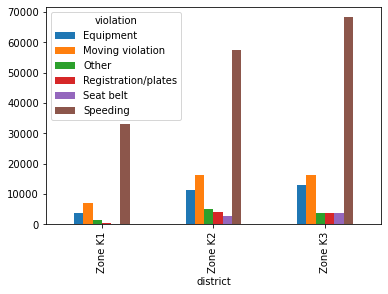

In [71]:
plt.figure(figsize=(10,6),dpi=200)
k_zones.plot(kind = 'bar')
plt.show()
#sns.barplot(x='level of education',y='salary',data=df,estimator=np.mean,ci='sd')

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

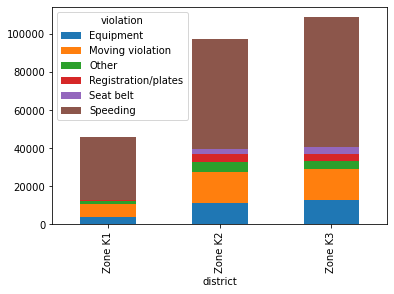

In [80]:
k_zones.plot(kind = 'bar',stacked = True)
plt.show()

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [81]:
# ri.stop_duration.unique
ri["stop_duration"].unique

<bound method Series.unique of stop_datetime
2005-01-02 01:55:00     0-15 Min
2005-01-02 20:30:00    16-30 Min
2005-01-04 12:55:00     0-15 Min
2005-01-06 01:30:00     0-15 Min
2005-01-12 08:05:00      30+ Min
                         ...    
2015-12-31 22:46:00     0-15 Min
2015-12-31 22:47:00     0-15 Min
2015-12-31 23:08:00     0-15 Min
2015-12-31 23:44:00     0-15 Min
2015-12-31 23:48:00     0-15 Min
Name: stop_duration, Length: 480584, dtype: object>

In [82]:
mapping = {"0-15 Min" : 8,
           "16-30 Min": 23,
           "30+ Min" : 45}

In [83]:
ri["stop_minutes"] = ri["stop_duration"].map(mapping)

In [85]:
ri["stop_minutes"].unique()

array([ 8., 23., 45., nan])

***

## Plotting stop length

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [87]:
ri.groupby("violation_raw").stop_minutes.mean()

violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.454326
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.834359
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589215
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64

In [88]:
stop_length = ri.groupby("violation_raw").stop_minutes.mean()

In [89]:
sorted_stop_length = stop_length.sort_values()

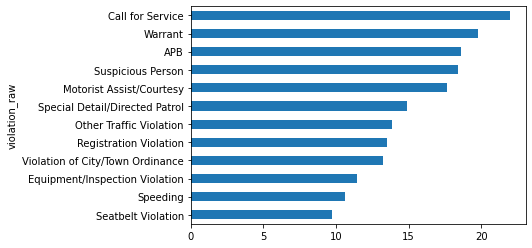

In [90]:
sorted_stop_length.plot(kind="barh")
plt.show()